In [1]:
import requests as r
import numpy as np
import pandas as pd
import json

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 

# Visualisation of TMDB data

In [46]:
moviedata = pd.read_csv('cleaned-movie-dataset.csv',index_col= 0)
moviedata

,popularity,original_language,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,budget,revenue,genres,year_released,decade_released,vote_count,vote_average
0,283.822,en,30.3952,755.450,47.613,9.4208,473.269,9.929,356000000.0,2.797801e+09,"['Adventure', 'Science Fiction', 'Action']",2019.0,2010s,17799,8.3
1,102.112,en,10.2648,108.804,13.136,4.0792,878.826,4.413,237000000.0,2.787965e+09,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009.0,2000s,23178,7.5
2,86.808,en,11.9526,201.581,25.466,4.2744,122.649,4.413,200000000.0,2.187464e+09,"['Drama', 'Romance']",1997.0,1990s,18982,7.9
3,53.930,en,16.0132,391.303,23.880,5.7828,235.947,11.482,245000000.0,2.068224e+09,"['Action', 'Adventure', 'Science Fiction', 'Fa...",2015.0,2010s,15675,7.4
4,299.524,en,30.3952,528.712,47.613,7.7592,501.005,9.929,300000000.0,2.046240e+09,"['Adventure', 'Action', 'Science Fiction']",2018.0,2010s,21489,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,1.750,ru,3.1046,25.528,5.111,0.7900,3.160,0.980,5000000.0,3.403120e+05,"['Action', 'Crime']",2002.0,2000s,16,4.9
9977,3.519,en,1.7600,13.000,4.311,0.7720,5.660,0.980,250000.0,3.401470e+05,['Drama'],1992.0,1990s,18,6.1
9984,11.229,en,13.0498,86.943,19.982,3.3982,20.783,10.098,8000000.0,3.371740e+05,"['Comedy', 'Music', 'Mystery', 'Crime']",2003.0,2000s,86,5.4
9988,8.034,en,4.9552,37.068,8.981,1.9628,19.471,2.338,11500000.0,3.347480e+05,"['Drama', 'Horror', 'Science Fiction']",1990.0,1990s,58,5.7


### Numerical data

We first look at the numerical data,

In [4]:
numericalmoviedata = moviedata[["popularity","top_casts_popularity_avg", "casts_popularity_sum", "top_cast_popularity","top_crews_popularity_avg","crews_popularity_sum","top_crew_popularity","budget","revenue","vote_count","vote_average"]]

Our variables range from the popularity of the movie, the popularity of top casts, the popularity of the top crew to the vote count and vote average a particular movie receives. Popularity of movie, casts and crew were taken as they may be variables that could predict if a movie is good, for example, the crew, such as the director, is more popular as they were able to win a movie award such as an Oscar which attributes to a "good" movie.

Let us look at the distribution of the following numerical variables,

In [5]:
numericalmoviedata.describe()

,popularity,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,budget,revenue,vote_count,vote_average
count,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7.070000e+03,7.070000e+03,7070.000000,7070.000000
mean,22.034036,6.675549,69.654300,11.533105,2.444061,46.715049,4.288791,2.854560e+07,8.361349e+07,1560.452051,6.373281
std,134.427790,4.045839,51.985797,8.319239,1.842192,57.130670,4.688274,4.104134e+07,1.684793e+08,2721.698691,1.086024
min,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,1.000000e+00,3.343190e+05,0.000000,0.000000
25%,9.259500,3.389400,31.236500,5.640000,1.304900,13.550250,1.646000,4.000000e+06,5.675220e+06,115.000000,5.900000
50%,13.335000,6.312300,59.881000,9.848000,1.888600,26.519500,2.717000,1.400000e+07,2.355636e+07,536.500000,6.500000
75%,21.240000,9.163100,95.094750,15.175000,2.963400,57.272500,4.725000,3.500000e+07,8.538627e+07,1688.000000,7.000000
max,10755.513000,32.164000,755.450000,49.734000,31.270200,878.826000,49.734000,9.653130e+08,2.797801e+09,28803.000000,10.000000


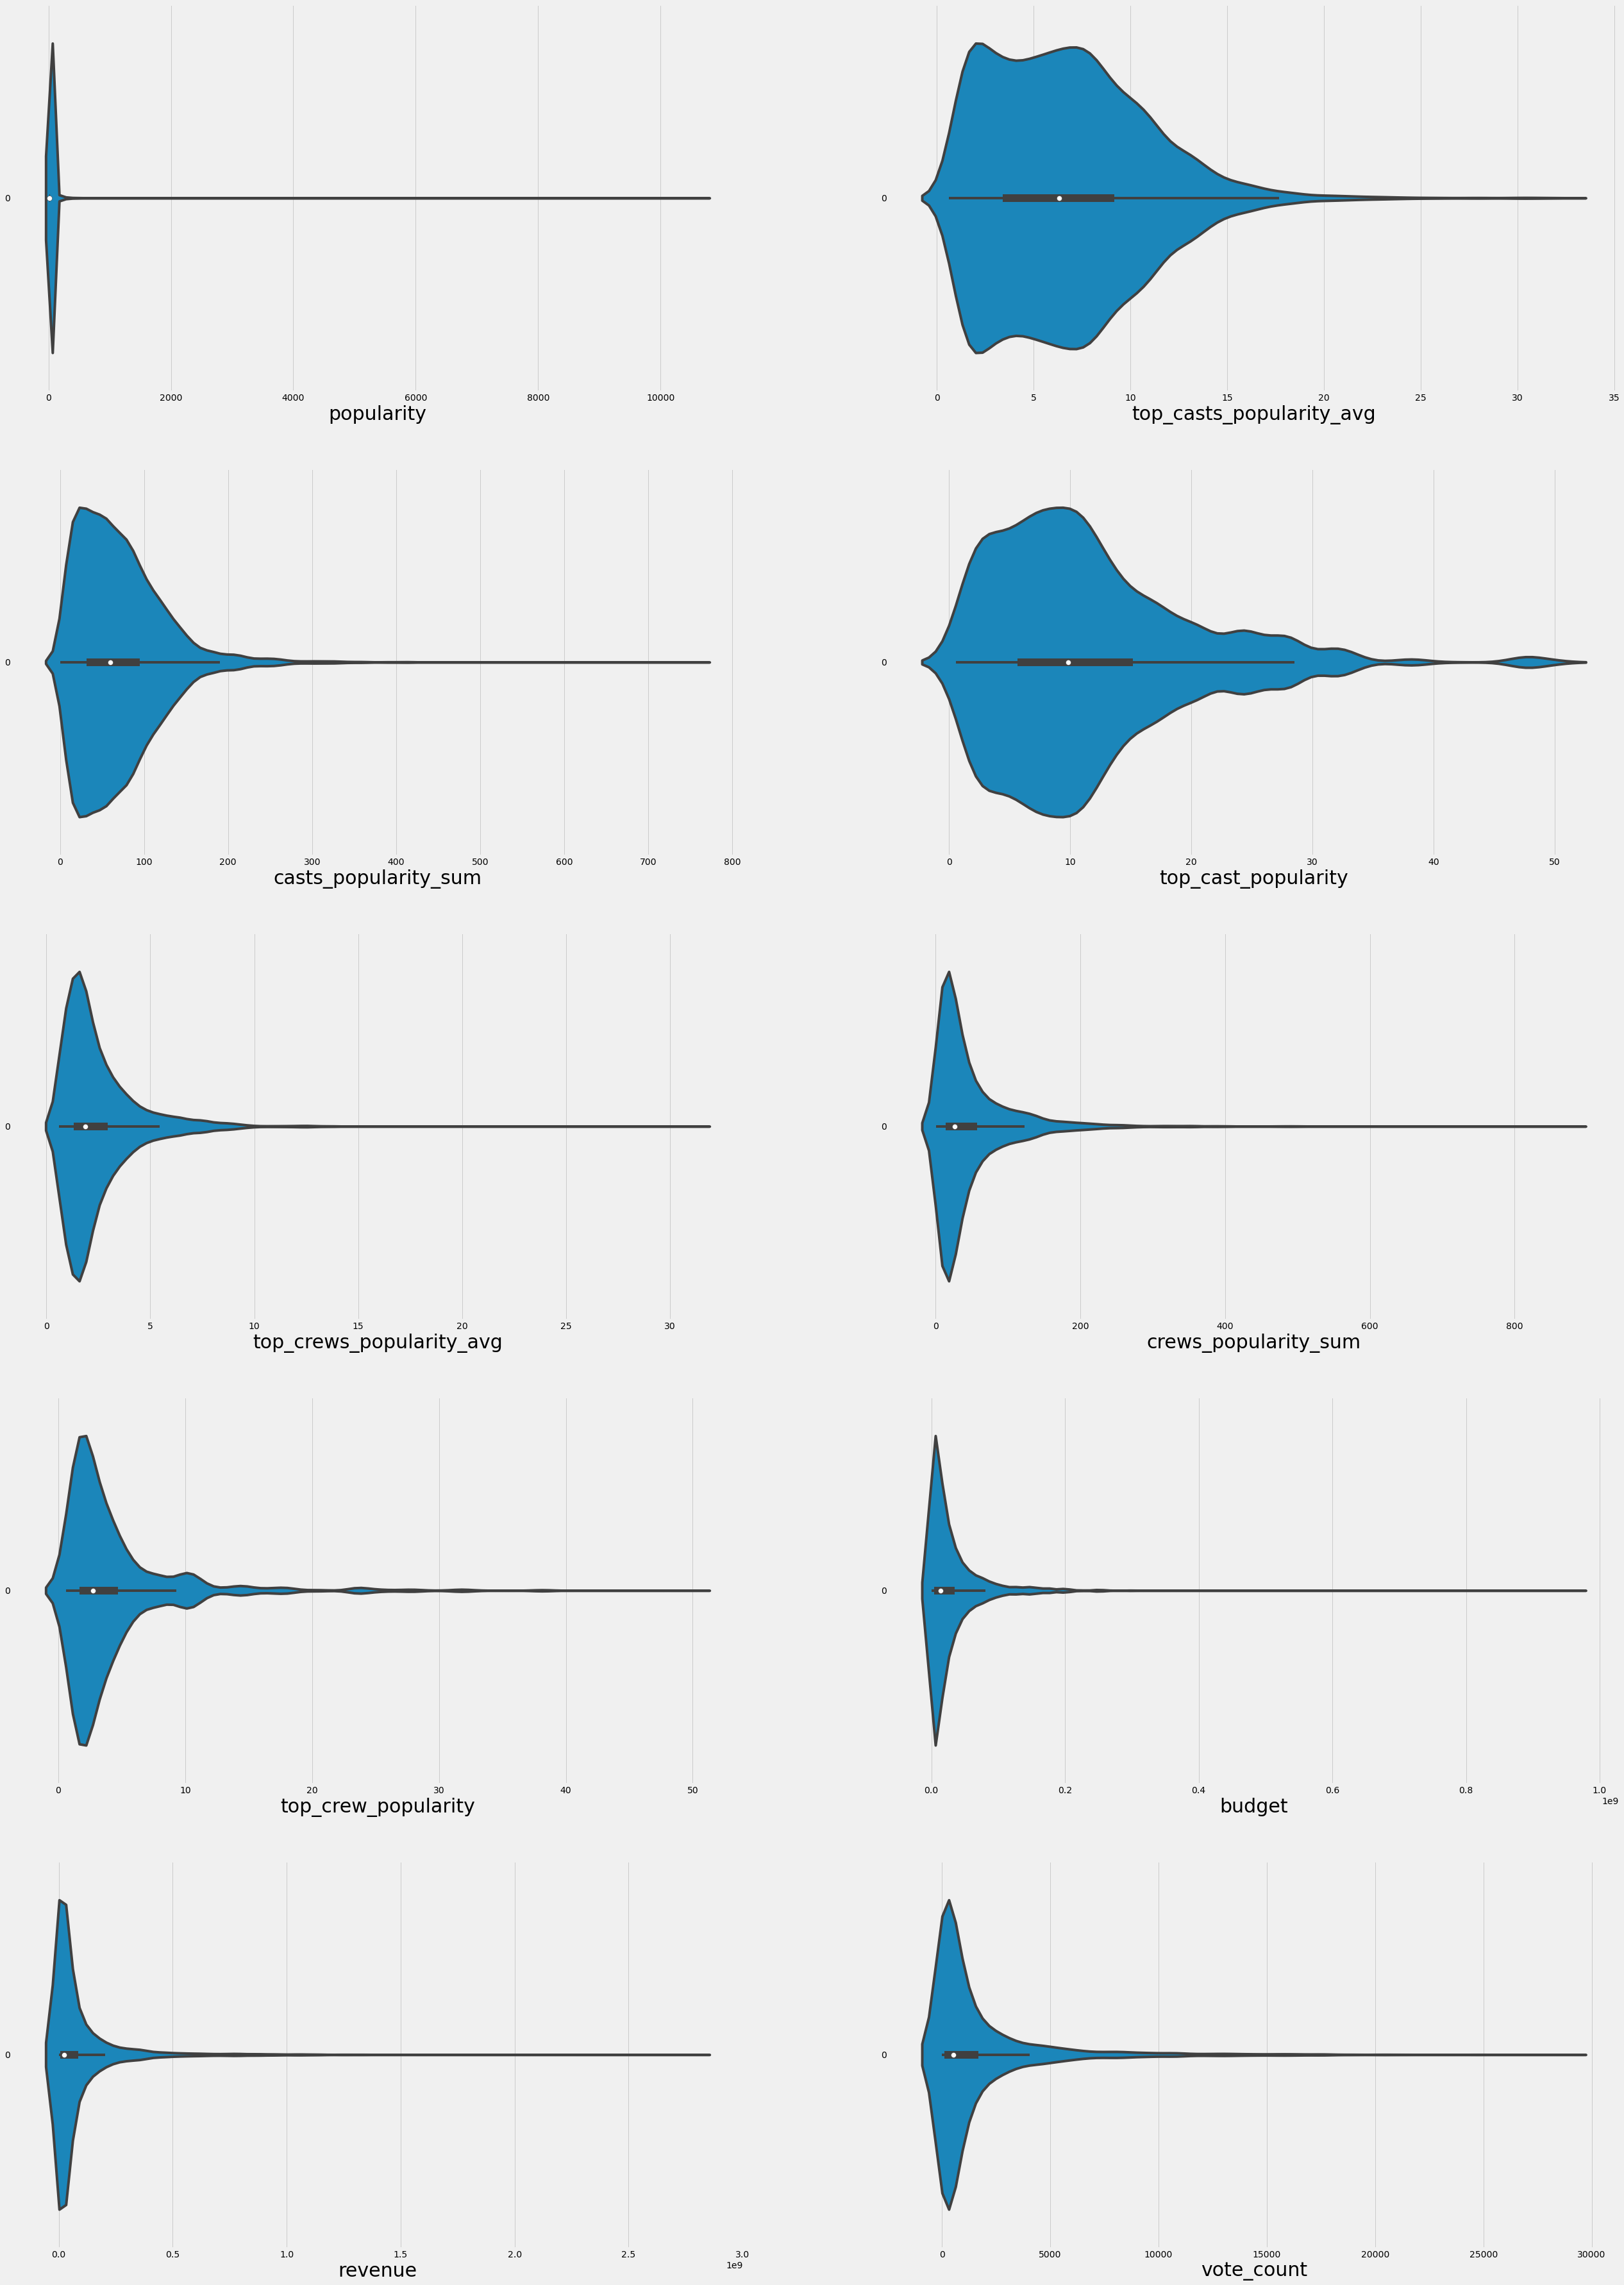

In [49]:
# Draw the distributions of all variables
f, axes = plt.subplots(5,2,figsize=(40,60))
count = 0
row = 0
othernumericaldata = [x for x in numericalmoviedata.columns if x != 'vote_average']
for var in othernumericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numericalmoviedata[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

As seen from these graphs, most of the numerical values are quite skewed to the left.

Here is the distribution of vote_average alone as it is our most important variable as it is our indicator if a movie is "good"

In [7]:
numericalmoviedata["vote_average"].describe()

count    7070.000000
mean        6.373281
std         1.086024
min         0.000000
25%         5.900000
50%         6.500000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

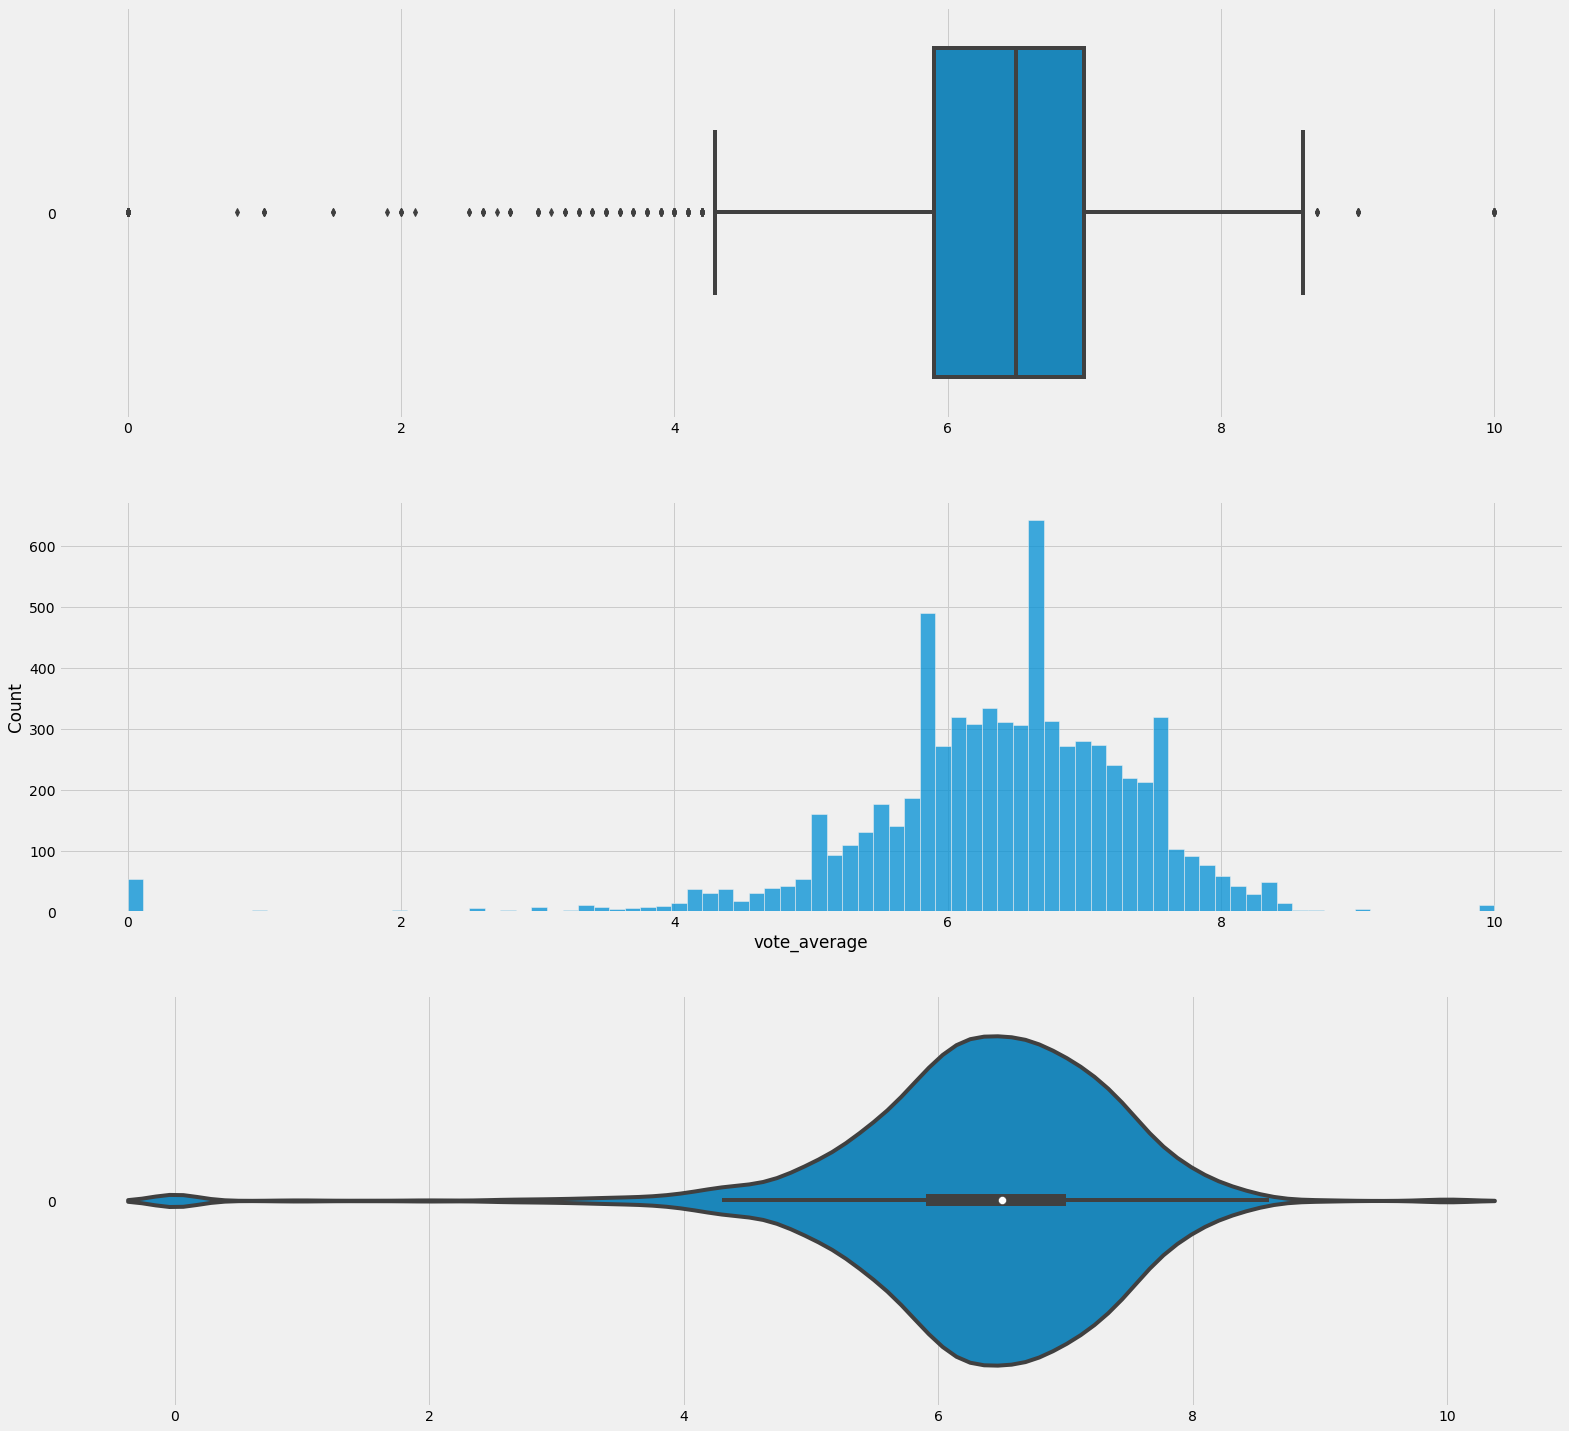

In [8]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = numericalmoviedata["vote_average"], orient = "h", ax = axes[0])
sb.histplot(data = numericalmoviedata["vote_average"],ax = axes[1])
sb.violinplot(data = numericalmoviedata["vote_average"], orient = "h", ax = axes[2])

Vote average's distribution is the most centred when comparing all the numerical data. We indicate if a movie is "good" if the vote average of the movie is equal or above 7.2 as 7.2 is its 80th percentile value, so we wanted a "good" movie to rate higher than or equal to its 80th percentile value.

In [42]:
np.percentile(numericalmoviedata["vote_average"],80)

7.2

In [43]:
(numericalmoviedata["vote_average"] >= 7.2).value_counts()

False    5581
True     1489
Name: vote_average, dtype: int64

Then, we look for the correlation between our numerical data,

In [44]:
numericalmoviedata.corr()

,popularity,top_casts_popularity_avg,casts_popularity_sum,top_cast_popularity,top_crews_popularity_avg,crews_popularity_sum,top_crew_popularity,budget,revenue,vote_count,vote_average
popularity,1.000000,0.132543,0.114711,0.115944,0.090270,0.106331,0.066711,0.132992,0.114956,0.116487,0.062966
top_casts_popularity_avg,0.132543,1.000000,0.852777,0.899791,0.507331,0.518814,0.416660,0.568121,0.472687,0.520119,0.154088
casts_popularity_sum,0.114711,0.852777,1.000000,0.692097,0.510302,0.555917,0.382239,0.610357,0.586882,0.597852,0.195172
top_cast_popularity,0.115944,0.899791,0.692097,1.000000,0.437471,0.422756,0.384897,0.455040,0.364311,0.413654,0.128535
top_crews_popularity_avg,0.090270,0.507331,0.510302,0.437471,1.000000,0.545853,0.865648,0.395172,0.374828,0.464127,0.191006
crews_popularity_sum,0.106331,0.518814,0.555917,0.422756,0.545853,1.000000,0.396938,0.587262,0.573976,0.621413,0.169790
top_crew_popularity,0.066711,0.416660,0.382239,0.384897,0.865648,0.396938,1.000000,0.291177,0.256503,0.313811,0.125157
budget,0.132992,0.568121,0.610357,0.455040,0.395172,0.587262,0.291177,1.000000,0.708289,0.566873,0.074643
revenue,0.114956,0.472687,0.586882,0.364311,0.374828,0.573976,0.256503,0.708289,1.000000,0.764671,0.186590
vote_count,0.116487,0.520119,0.597852,0.413654,0.464127,0.621413,0.313811,0.566873,0.764671,1.000000,0.319815


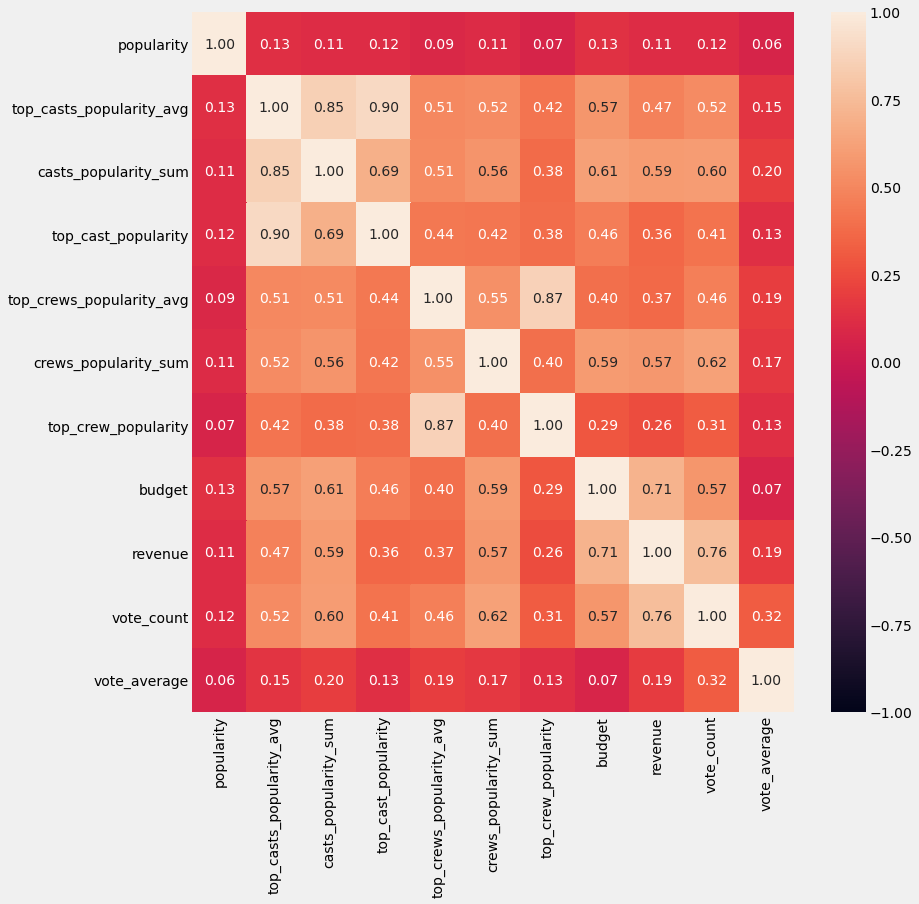

In [63]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sb.heatmap(numericalmoviedata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Seeing from the heatmap, the correlation between vote average and all the other numerical data have a low correlation, with all of their correlation being below 0.3, with vote_count having the highest at 0.26. This shows that all the variables have a low linear correlation against vote_average. So, they have a poor linear relationship. However, this may mean that they may be non-linear relationship. So, we shall also explore non-linear models.

So, let us look at their various scatterplots,

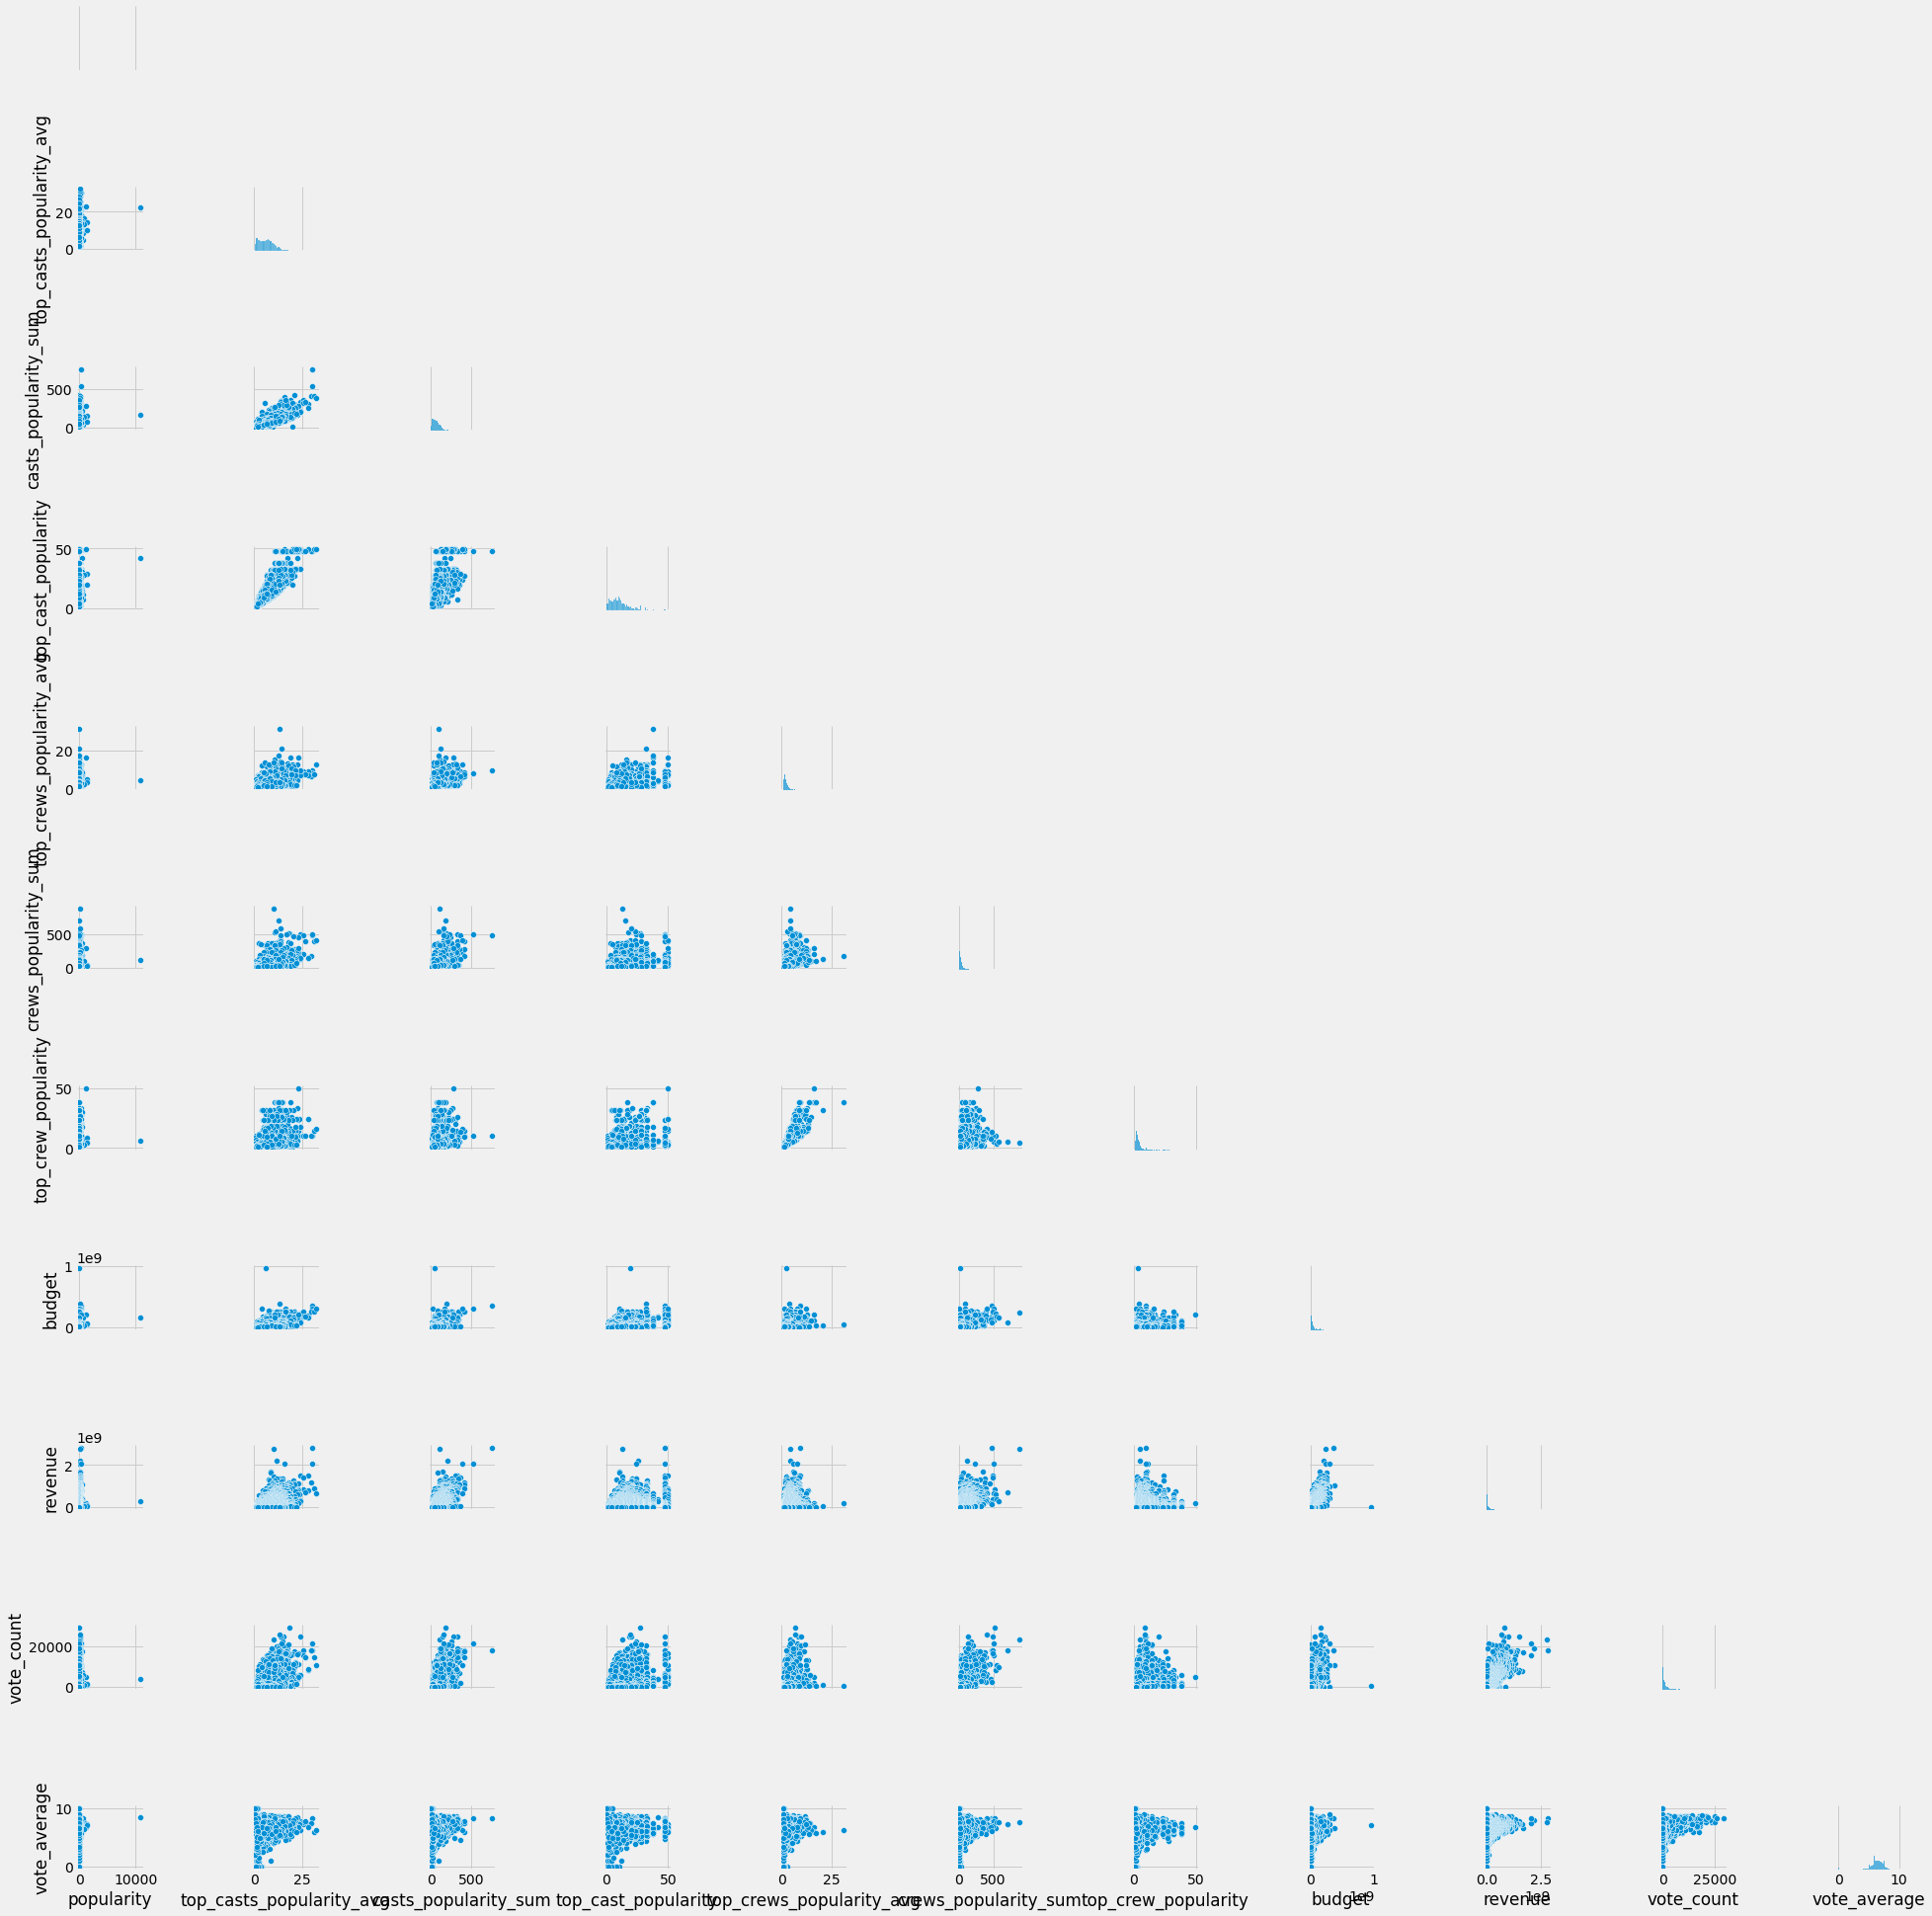

In [13]:
sb.pairplot(data = numericalmoviedata, corner = True)

Specifically for vote_average against the other numerical variables

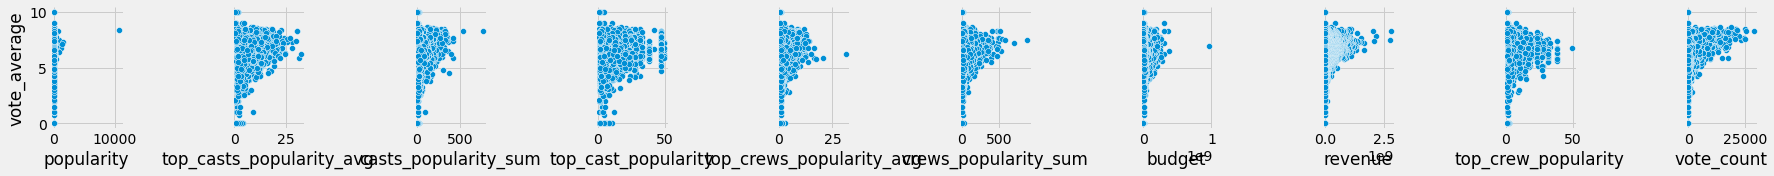

In [14]:
sb.pairplot(data=numericalmoviedata,
                  y_vars=['vote_average'],
                  x_vars=['popularity', 'top_casts_popularity_avg', 'casts_popularity_sum', 'top_cast_popularity', 'top_crews_popularity_avg', 'crews_popularity_sum','budget','revenue', 
'top_crew_popularity', 'vote_count'])

### Categorical data

Then, let us look at some categorical data,

In [15]:
categoricalmoviedata = moviedata[["original_language","genres","decade_released","vote_average"]]
categoricalmoviedata

,original_language,genres,decade_released,vote_average
0,en,"['Adventure', 'Science Fiction', 'Action']",2010s,8.3
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2000s,7.5
2,en,"['Drama', 'Romance']",1990s,7.9
3,en,"['Action', 'Adventure', 'Science Fiction', 'Fa...",2010s,7.4
4,en,"['Adventure', 'Action', 'Science Fiction']",2010s,8.3
...,...,...,...,...
7065,ru,"['Action', 'Crime']",2000s,4.9
7066,en,['Drama'],1990s,6.1
7067,en,"['Comedy', 'Music', 'Mystery', 'Crime']",2000s,5.4
7068,en,"['Drama', 'Horror', 'Science Fiction']",1990s,5.7


Categorical variables chosen here would be decade released, genres and original language. Decade released is used as the categorical variable for year released as using year released as a numerical data would be rather odd, since the median or average year released does not make sense. However, it would make more sense to think of year released as if they were genres, as 80s movies vs 00s movies have a certain style to them that is unique to them, that is why decade released is a categorical data. <br>Original language is chosen to represent where the movie may be from as people from English speaking countries would probably also watch English speaking movies even if it was not produced in their own country, so it would be hard to specify exactly which English speaking country the film is from.

In [16]:
categoricalmoviedata["decade_released"].value_counts()

2010s                  2542
2000s                  2089
1990s                  1093
1980s                   630
Movies before 1960s     264
1970s                   231
1960s                   148
2020s                    73
Name: decade_released, dtype: int64

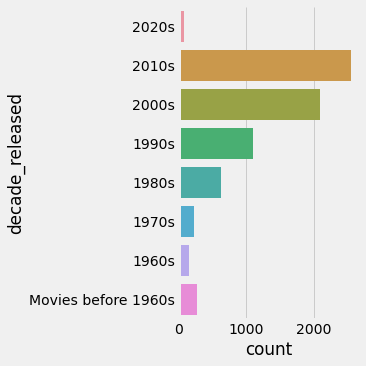

In [17]:
sb.catplot(y = "decade_released", data = categoricalmoviedata, kind = "count", order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])

In [18]:
categoricalmoviedata["original_language"].value_counts()

en    5634
hi     259
fr     157
ru     150
es     106
ta      94
ml      76
ja      72
ko      59
zh      58
it      53
te      47
de      36
cn      25
no      19
kn      19
sv      19
tr      18
pt      18
fa      16
nl      14
ur      12
ar      11
da       9
tl       8
fi       7
he       7
th       6
pl       6
pa       5
ms       5
vi       4
cs       4
id       4
hu       4
bn       4
uk       3
mr       3
ro       3
el       2
km       1
nb       1
si       1
mn       1
sk       1
ca       1
lt       1
ne       1
az       1
ku       1
gl       1
gu       1
et       1
af       1
Name: original_language, dtype: int64

There are many different languages found in this dataset, so we will only be looking at languages which was used by at least 30 movies so that it would be at least follow a normal distribution via central limit theorem.

In [34]:
morelanguage = categoricalmoviedata[categoricalmoviedata["original_language"].isin(["en","hi","fr","ru","es","ta","ml","ja","ko","zh","it","te","de"])]

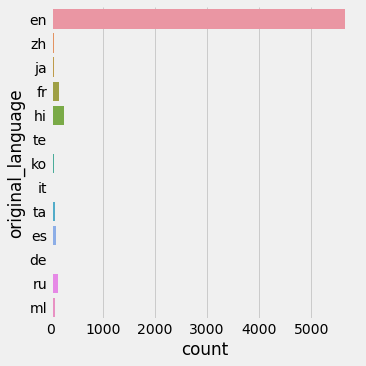

In [52]:
sb.catplot(y = "original_language", data = morelanguage, kind = "count")

Let us see these categorical variables against vote average,

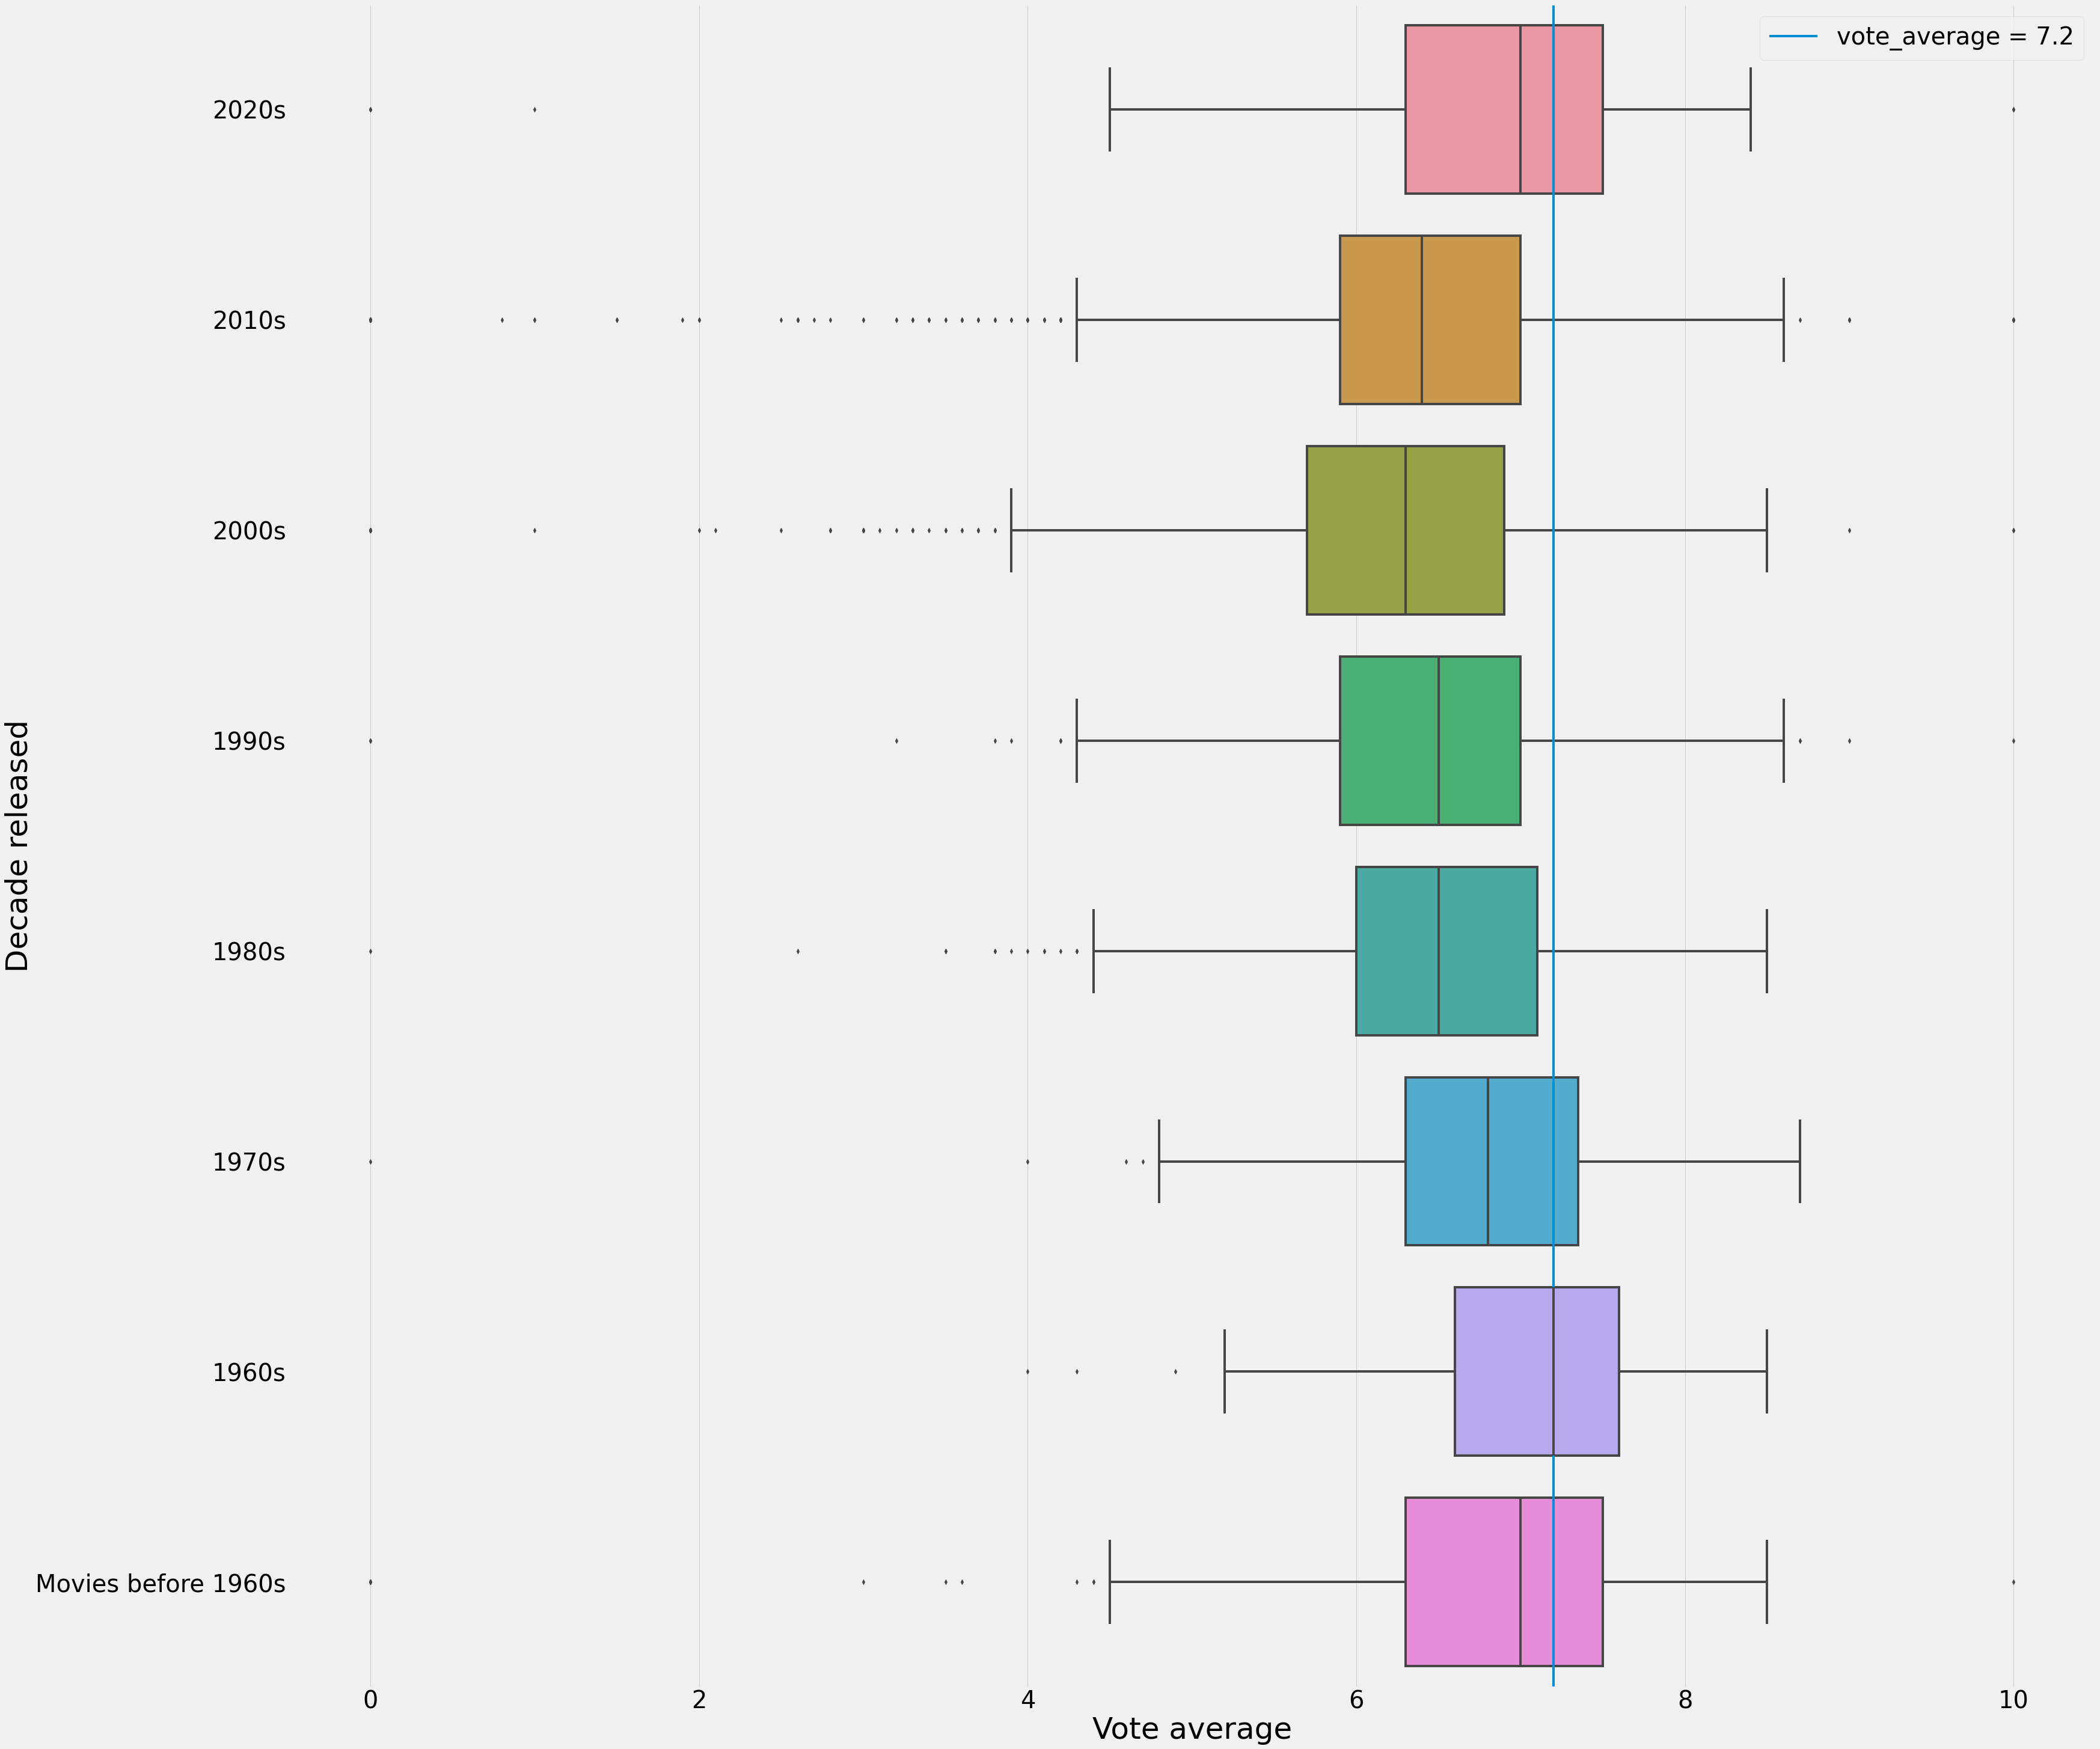

In [70]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "decade_released", data = categoricalmoviedata, orient = "h",order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Movies before 1960s"])
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Vote average",fontsize=50)
ax.set_ylabel("Decade released",fontsize=50)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=40)
plt.show()

Looking at these graphs, it would seem that older movies such as movies before 1960s and 1960s and very recent movies from 2020s tend to have higher vote average.

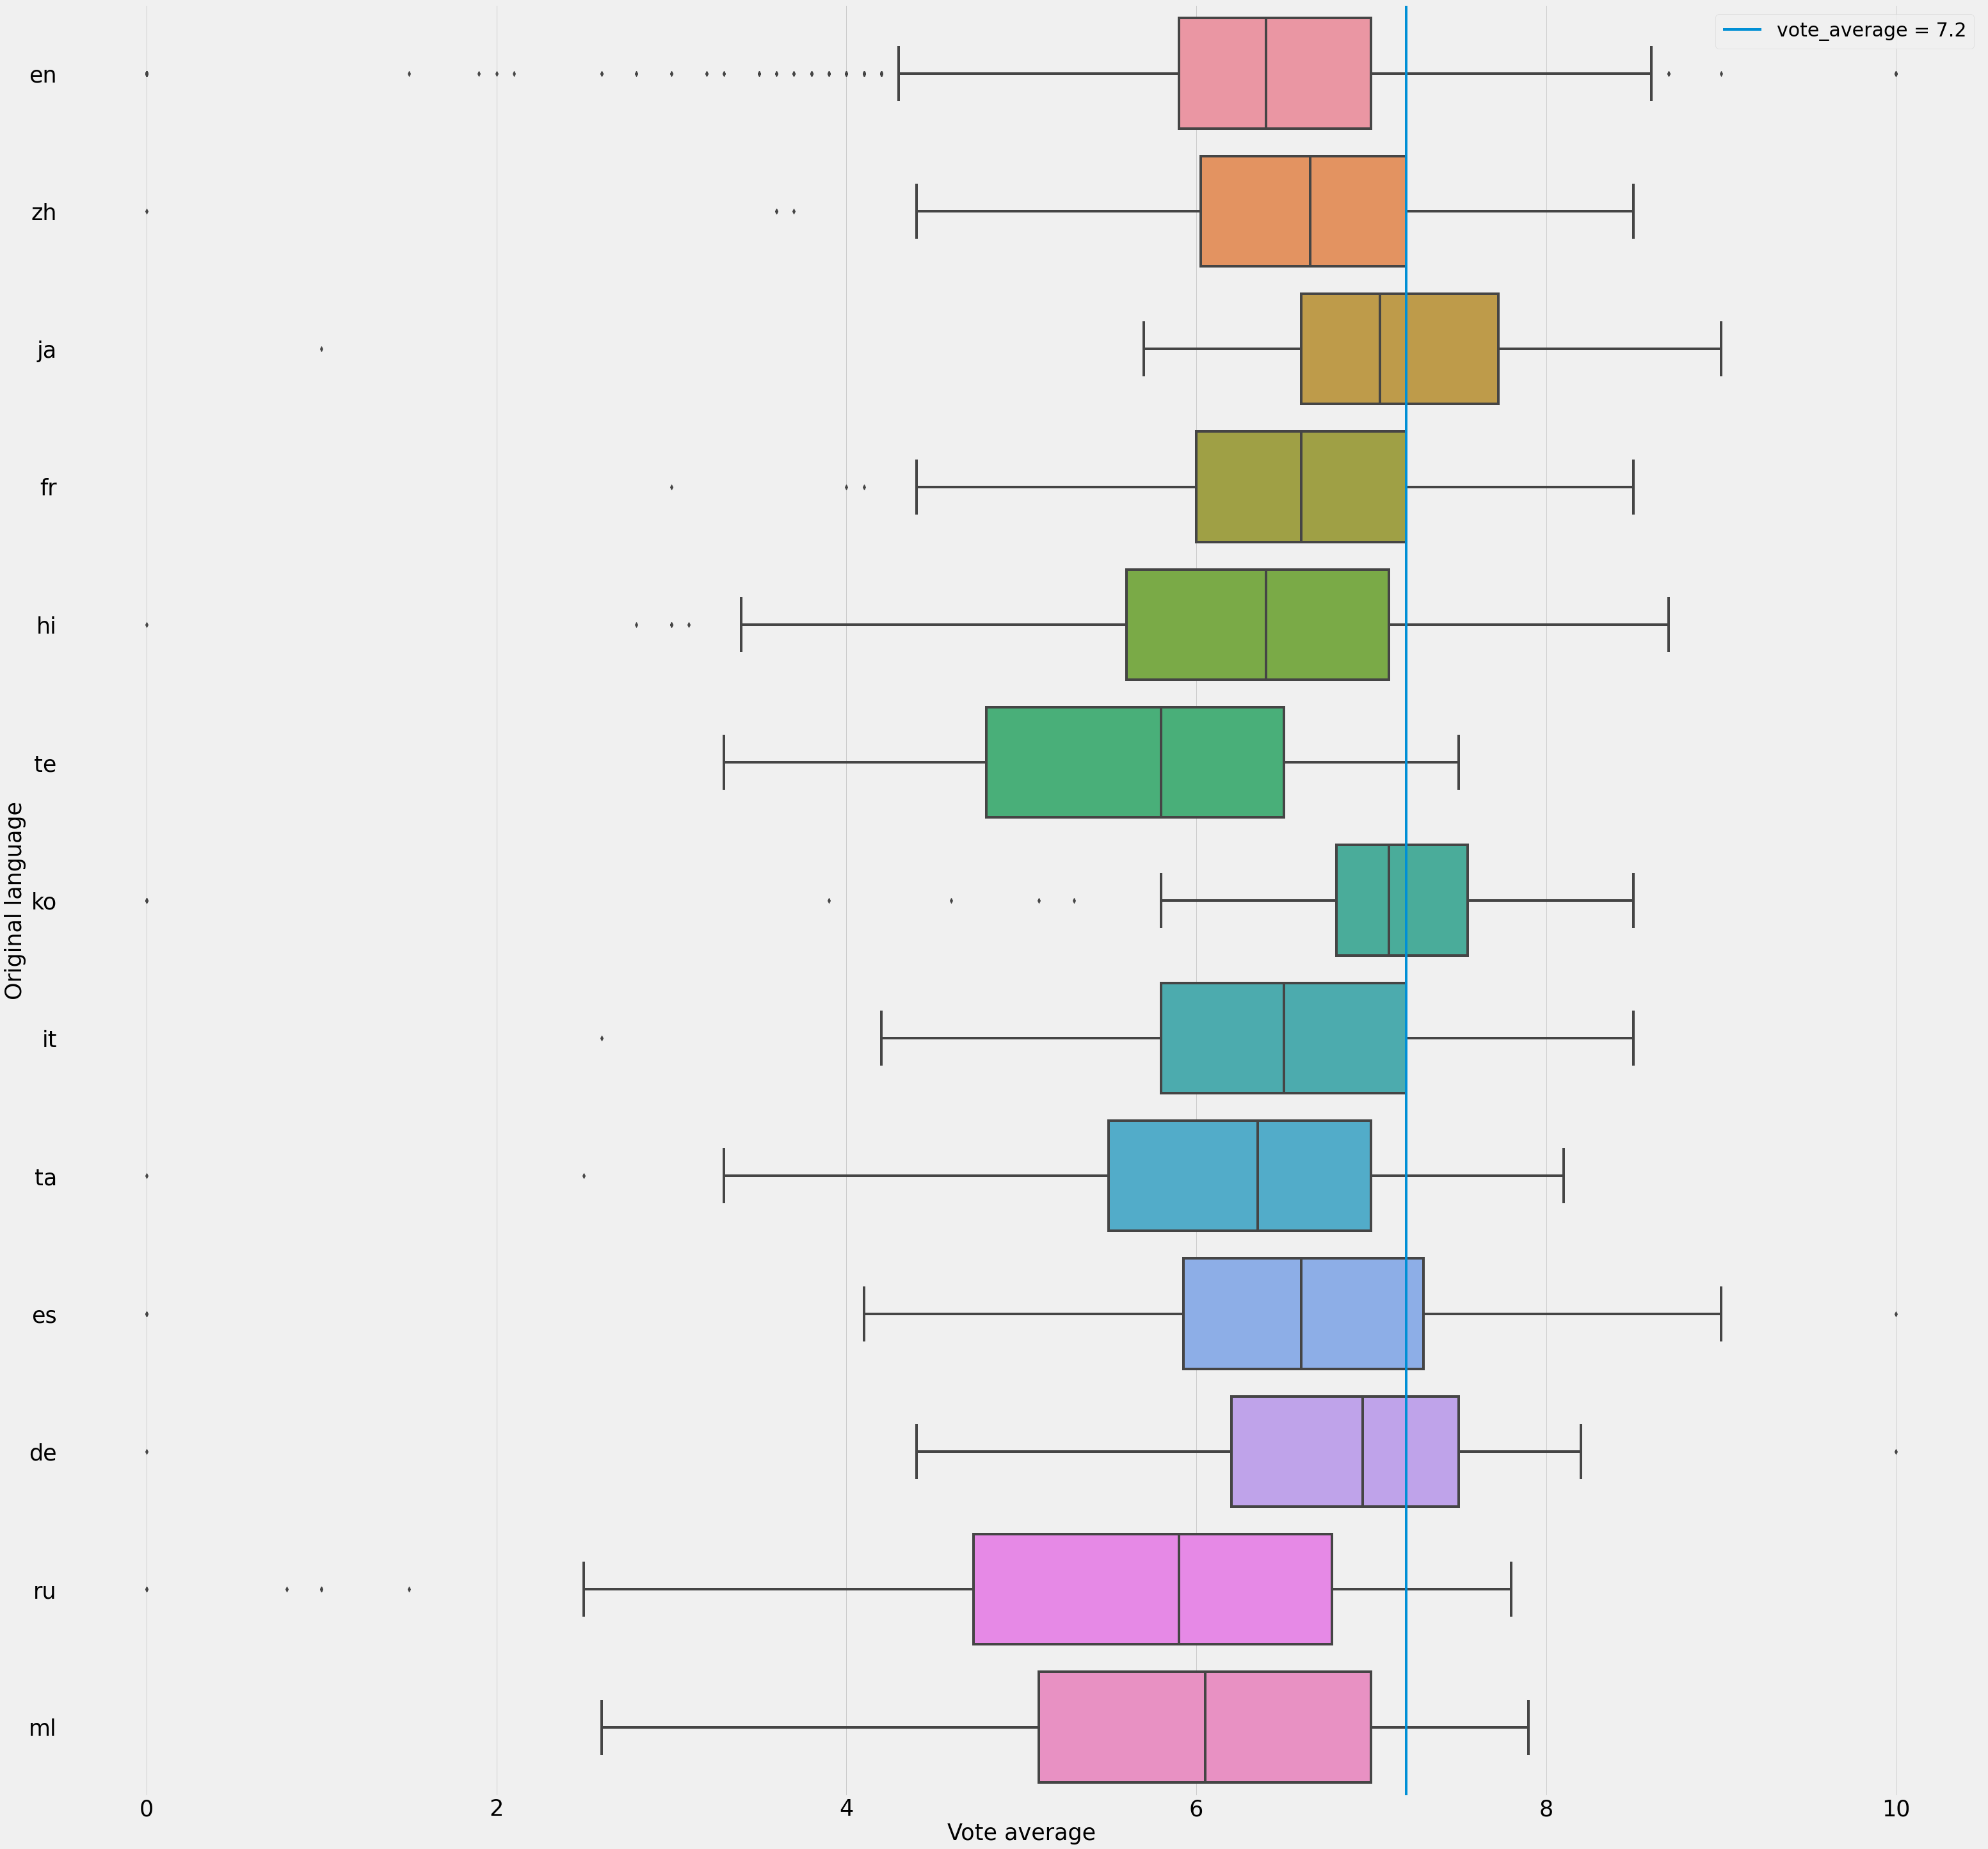

In [69]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "original_language", data = morelanguage, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Vote average",fontsize=35)
ax.set_ylabel("Original language",fontsize=35)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()

In [23]:
API_KEY = 'db6bd34e31c99738cfb114ed7ad6d566'

Here are the genres that are available on TMDB,

In [24]:
genrelists = r.get(f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US")
genrelist = genrelists.json()['genres']
ids = {}
for i in genrelist:
    ids[i['name']] = 0
print("List of genres: ", list(ids.keys()))

List of genres:  ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [25]:
from ast import literal_eval
for eachmovie in categoricalmoviedata["genres"]:
    try:
        eachmovie = literal_eval(eachmovie)
    except:
        continue
    for index in range(len(eachmovie)):
        ids[eachmovie[index]] += 1

As some movies have multiple genres attached to it, the following graph is merely counting whenever a movie has a specific genre, so it counts the frequency of each individual genre.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

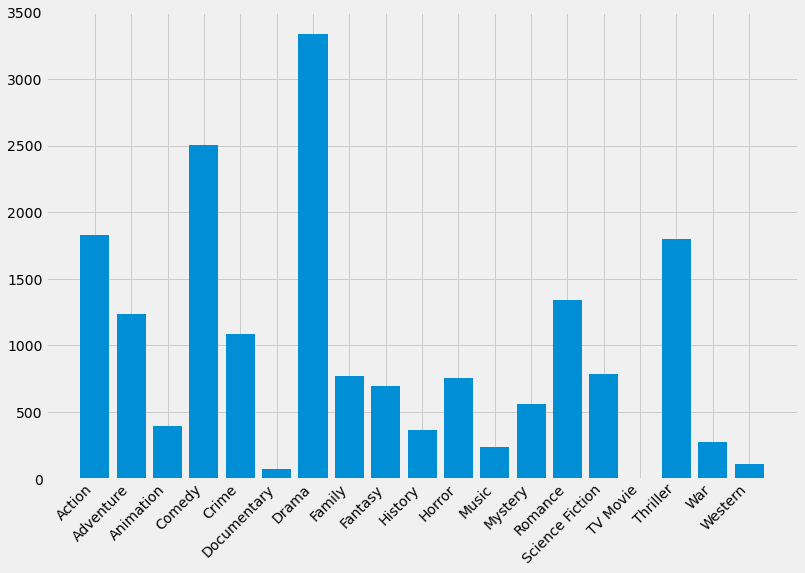

In [26]:
f,ax = plt.subplots(figsize=(12,8))
plt.bar(ids.keys(),ids.values())
plt.xticks(rotation = 45, ha = 'right')

So, the most frequent genres are Drama, Comedy and Action.

In [27]:
firstgenre = []
for eachmovie in categoricalmoviedata["genres"]:
    try:
        eachmovie = literal_eval(eachmovie)
        firstgenre.append(eachmovie[0])
    except:
        firstgenre.append(np.nan)
withfirstgenre = categoricalmoviedata.copy()
withfirstgenre["first_genre"] = firstgenre

In [28]:
withfirstgenre

,original_language,genres,decade_released,vote_average,first_genre
0,en,"['Adventure', 'Science Fiction', 'Action']",2010s,8.3,Adventure
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2000s,7.5,Action
2,en,"['Drama', 'Romance']",1990s,7.9,Drama
3,en,"['Action', 'Adventure', 'Science Fiction', 'Fa...",2010s,7.4,Action
4,en,"['Adventure', 'Action', 'Science Fiction']",2010s,8.3,Adventure
...,...,...,...,...,...
7065,ru,"['Action', 'Crime']",2000s,4.9,Action
7066,en,['Drama'],1990s,6.1,Drama
7067,en,"['Comedy', 'Music', 'Mystery', 'Crime']",2000s,5.4,Comedy
7068,en,"['Drama', 'Horror', 'Science Fiction']",1990s,5.7,Drama


Since multiple genres are attached to one movie, it is quite difficult to see if the relationship between genre and vote average. So, in an attempt to see if there is a correlation between genre and vote average, the first genre in the list of genres was taken to compare, as the genres do not seem to be arranged in the alphabetical order or by the id order, so there may be another reason that the genres are arranged in such a way, with one reason being it was decided as the most relevant genre associated to the movie.

In [29]:
withfirstgenre["first_genre"].value_counts()

Drama              1656
Comedy             1487
Action             1163
Adventure           485
Horror              434
Crime               354
Thriller            293
Animation           200
Romance             187
Fantasy             173
Science Fiction     165
Family              113
Mystery              78
Music                58
War                  55
Documentary          53
History              51
Western              47
TV Movie              2
Name: first_genre, dtype: int64

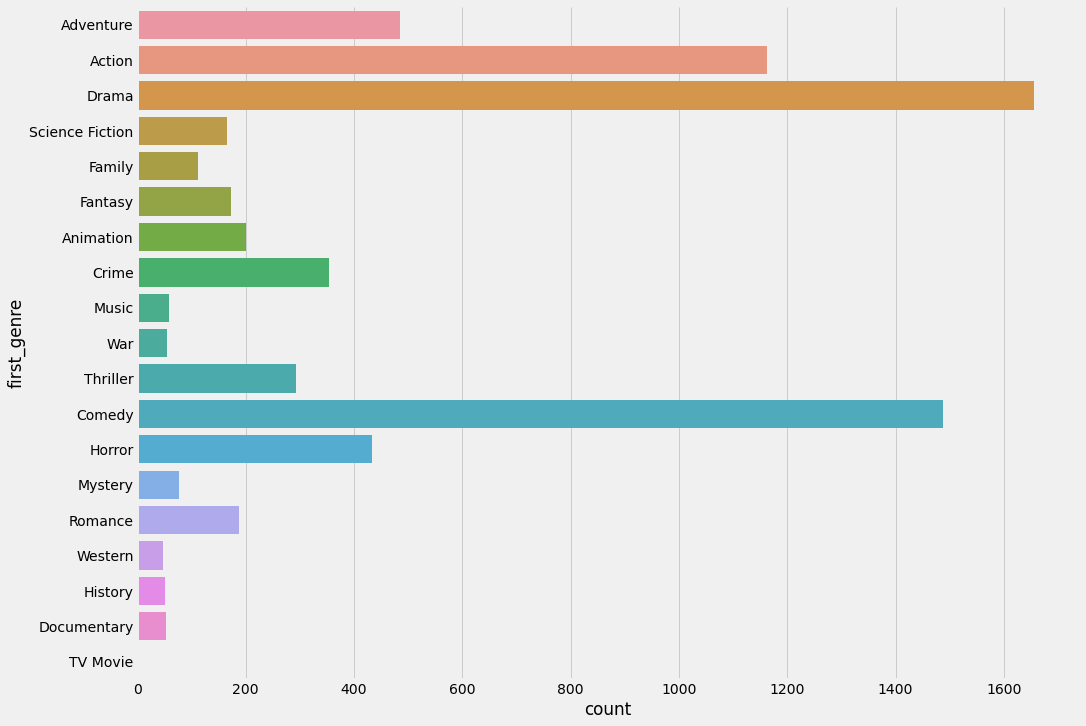

In [31]:
sb.catplot(y = "first_genre", data = withfirstgenre, kind = "count", height= 10, aspect= 1.5)

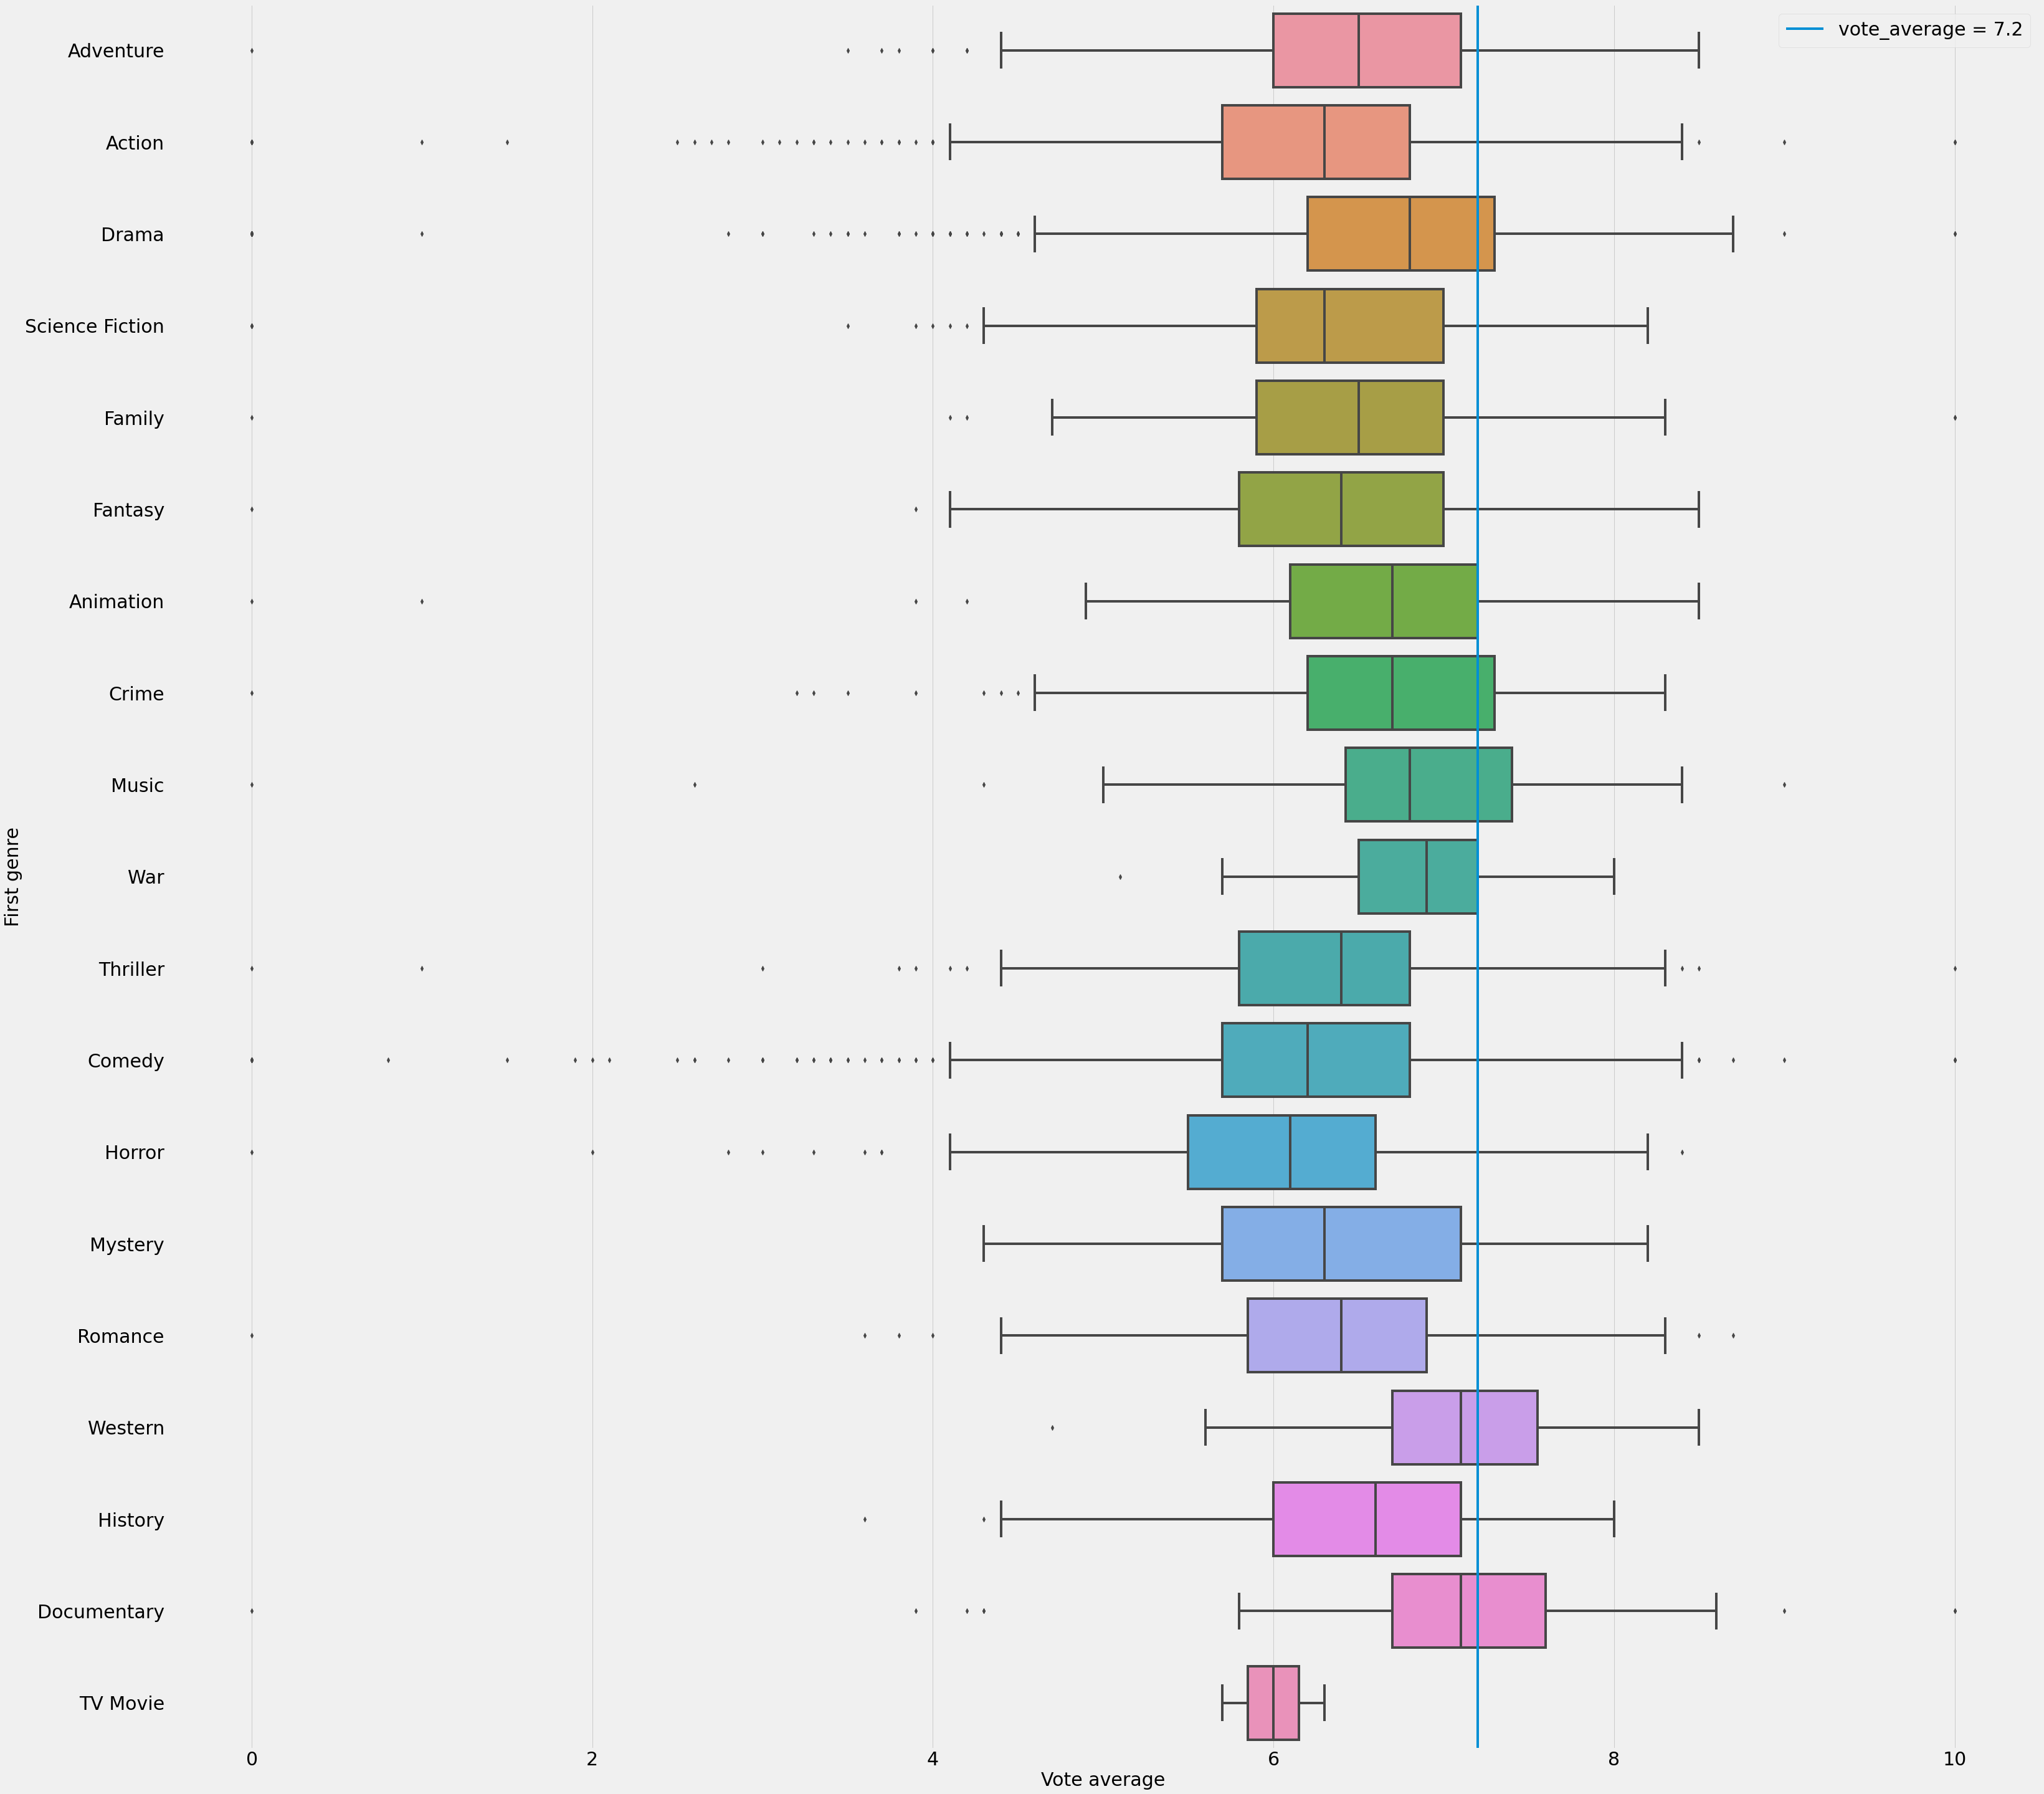

In [32]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "first_genre", data = withfirstgenre, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("Vote average",fontsize=30)
ax.set_ylabel("First genre",fontsize=30)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()

From the data, we see that the Comedy and Horror genres have one of the lower vote averages, and Drama, Documentary and Western having one of the higher vote averages. However, predicting via the first genre is still quite unreliable as multiple genres are attached to the movie and we are not sure as to how they are arranged so we will not use genre to predict if a movie is "good".